In [11]:
import pylab 
import numpy
import autograd.numpy as np 
import autograd.numpy.random as npr 
from autograd import grad 
import sklearn.metrics 
import theano.tensor as T 
from theano import function
from theano import shared
from keras.datasets import imdb, reuters
from keras import layers
from keras import models
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
x=numpy.linspace(-1,1,100)
signal=2+x+2*x*x*x
noise=numpy.random.normal(0,0.1,100)
y=signal+noise
pylab.plot(signal,'b')
pylab.plot(y,'g') 
pylab.plot(noise, 'r') 
pylab.xlabel("x") 
pylab.ylabel("y") 
pylab.legend(["Without Noise", "With Noise", "Noise"], loc = 2)

In [ ]:
x_train=x[0:80]
y_train=y[0:80]


In [ ]:
pylab.figure()
degree=2
X_train=numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)])
model=numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()),y_train)
pylab.plot(x,y,'g') 
pylab.xlabel("x") 
pylab.ylabel("y") 
predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)]) 
pylab.plot(x, predicted,'r') 
pylab.legend(["Actual", "Predicted"], loc = 2) 
train_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))) 
test_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))) 
print("Train RMSE (Degree = 1)", train_rmse1) 
print("Test RMSE (Degree = 1)", test_rmse1)


In [ ]:
# Model with degree 2                 
pylab.figure() 
degree = 3 
X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)]) 
model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()),y_train) 
pylab.plot(x,y,'g') 
pylab.xlabel("x") 
pylab.ylabel("y") 
predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)]) 
pylab.plot(x, predicted,'r') 
pylab.legend(["Actual", "Predicted"], loc = 2) 
train_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))) 
test_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))) 
print("Train RMSE (Degree = 2)", train_rmse1) 
print("Test RMSE (Degree = 2)", test_rmse1)

In [ ]:
# Model with degree 8 
pylab.figure() 
degree = 9 
X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)]) 
model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()), y_train) 
pylab.plot(x, y,'g') 
pylab.xlabel("x") 
pylab.ylabel("y") 
predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)]) 
pylab.plot(x, predicted,'r') 
pylab.legend(["Actual", "Predicted"], loc = 3) 
train_rmse2 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))) 
test_rmse2 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))) 
print("Train RMSE (Degree = 8)", train_rmse2) 
print("Test RMSE (Degree = 8)", test_rmse2)

In [ ]:
# Model with degree 3
pylab.figure() 
degree = 4 
X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)]) 
model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()), y_train) 
pylab.plot(x, y,'g') 
pylab.xlabel("x") 
pylab.ylabel("y") 
predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)]) 
pylab.plot(x, predicted,'r') 
pylab.legend(["Actual", "Predicted"], loc = 3) 
train_rmse2 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))) 
test_rmse2 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))) 
print("Train RMSE (Degree = 3)", train_rmse2) 
print("Test RMSE (Degree = 3)", test_rmse2)

In [ ]:
# Model with degree 4
pylab.figure() 
degree = 5
X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)]) 
model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()), y_train) 
pylab.plot(x, y,'g') 
pylab.xlabel("x") 
pylab.ylabel("y") 
predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)]) 
pylab.plot(x, predicted,'r') 
pylab.legend(["Actual", "Predicted"], loc = 3) 
train_rmse2 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))) 
test_rmse2 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))) 
print("Train RMSE (Degree = 4)", train_rmse2) 
print("Test RMSE (Degree = 4)", test_rmse2)

In [ ]:
examples = 1000
features = 100
D = (npr.randn(examples, features), npr.randn(examples)) 
# Specify the network 
layer1_units = 20 
layer2_units = 1 
w1 = npr.rand(features, layer1_units) 
b1 = npr.rand(layer1_units) 
w2 = npr.rand(layer1_units, layer2_units) 
b2 = 0.0 
theta = (w1, b1, w2, b2) 
# Define the loss function 
def squared_loss(y, y_hat):     
    return np.dot((y - y_hat),(y - y_hat)) 
#Output Layer 
def binary_cross_entropy(y, y_hat):     
    return np.sum(-((y * np.log(y_hat)) + ((1-y) * np.log(1 - y_hat)))) 
# Wraper around the Neural Network 
def neural_network(x, theta):     
    w1, b1, w2, b2 = theta     
    return np.tanh(np.dot((np.tanh(np.dot(x,w1) + b1)), w2) + b2)
# Wrapper around the objective function to be optimised 
def objective(theta, idx):     
    return squared_loss(D[1][idx], neural_network(D[0][idx], theta)) 
# Update 
def update_theta(theta, delta, alpha):     
    w1, b1, w2, b2 = theta     
    w1_delta, b1_delta, w2_delta, b2_delta = delta     
    w1_new = w1 - alpha * w1_delta     
    b1_new = b1 - alpha * b1_delta     
    w2_new = w2 - alpha * w2_delta     
    b2_new = b2 - alpha * b2_delta     
    new_theta = (w1_new,b1_new,w2_new,b2_new)     
    return new_theta

# Compute Gradient
grad_objective = grad(objective) 
# Train the Neural Network 
epochs = 20
print ("RMSE before training:",
sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))
rmse = [] 
for i in range(0, epochs):     
    for j in range(0, examples):         
        delta = grad_objective(theta, j)         
        theta = update_theta(theta,delta, 0.01) 
        rmse.append(sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta))) 
print ("RMSE after training:", 
sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta))) 


In [ ]:
pylab.plot(rmse) 
pylab.show()

In [ ]:
a = T.dscalar('a') 
b = T.dscalar('b') 
c = T.dscalar('c') 
d = T.dscalar('d') 
e = T.dscalar('e') 
f= ((a - b + c) * d )/e 
g = function([a, b, c, d, e], f) 
print ("Expected: ((1 - 2 + 3) * 4)/5.0 = ", ((1 - 2 + 3) * 4)/5.0 )
print ("Via Theano: ((1 - 2 + 3) * 4)/5.0 = ",  g(1, 2, 3, 4, 5))

In [ ]:
y = shared(numpy.array([[4, 5, 6]]))
print(y.get_value())

# Binary classification

In [ ]:
(train_data,train_labels),(test_data,test_labels) =imdb.load_data(num_words=10000)

In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
def vectorize_sequences(sequences,dimensions=10000):
    results=np.zeros((len(sequences),dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results


In [ ]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
y_train=np.asarray(train_labels).astype('float32').reshape((-1,1))
y_test=np.asarray(test_labels).astype('float32').reshape((-1,1))

In [ ]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict=history.history
history_dict.keys()

In [ ]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and valitation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])



test_model=model.fit(partial_x_train,
                     partial_y_train,
                     epochs=4,
                     batch_size=512,
                     validation_data=(x_val,y_val))
results=model.evaluate(x_test,y_test)
print(results)
history_dict_test=test_model.history
history_dict_test.keys()

In [ ]:
model.predict(x_test)

In [ ]:
loss_values=history_dict_test['loss']
val_loss_values=history_dict_test['val_loss']

epochs=range(1,len(history_dict_test['accuracy'])+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and valitation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values=history_dict_test['accuracy']
val_acc_values=history_dict_test['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Multiclass classification

In [7]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [20]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [8]:
len(train_data)

8982

### Decoding back to words

In [9]:
word_index=reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [32]:
def vectorize(sequences,dimensions=10000):
    results=np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train=vectorize(train_data)
x_test=vectorize(test_data)

In [33]:
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [34]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
          
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))


Epoch 1/20
16/16 [==============================] - 0s 15ms/step - loss: 2.5519 - accuracy: 0.5350 - val_loss: 1.6876 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.3886 - accuracy: 0.7110 - val_loss: 1.3029 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0537 - accuracy: 0.7685 - val_loss: 1.1375 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8417 - accuracy: 0.8132 - val_loss: 1.0352 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6724 - accuracy: 0.8528 - val_loss: 0.9692 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5423 - accuracy: 0.8861 - val_loss: 0.9302 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4375 - accuracy: 0.9089 - val_loss: 0.9016 - val_accuracy: 0.8100
Epoch 8/20
16

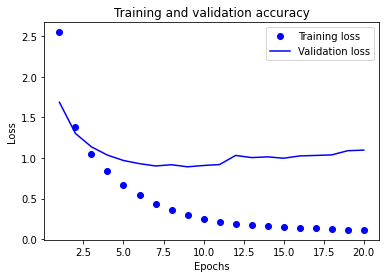

In [35]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

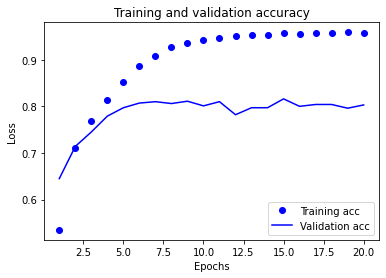

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [50]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=128,
         validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)
results

Epoch 1/9
63/63 [==============================] - 1s 6ms/step - loss: 1.9244 - accuracy: 0.5598 - val_loss: 1.4157 - val_accuracy: 0.6790
Epoch 2/9
63/63 [==============================] - 0s 5ms/step - loss: 1.1811 - accuracy: 0.7220 - val_loss: 1.1913 - val_accuracy: 0.7200
Epoch 3/9
63/63 [==============================] - 0s 5ms/step - loss: 0.8623 - accuracy: 0.7907 - val_loss: 1.1667 - val_accuracy: 0.7460
Epoch 4/9
63/63 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.8518 - val_loss: 1.1262 - val_accuracy: 0.7610
Epoch 5/9
63/63 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.8965 - val_loss: 1.2015 - val_accuracy: 0.7600
Epoch 6/9
63/63 [==============================] - 0s 5ms/step - loss: 0.3274 - accuracy: 0.9219 - val_loss: 1.1731 - val_accuracy: 0.7830
Epoch 7/9
63/63 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.9380 - val_loss: 1.3609 - val_accuracy: 0.7890
Epoch 8/9
63/63 [==========

[1.4895929098129272, 0.7738201022148132]